# EDA

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/taxi_trip_pricing.csv")

In [97]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


base_fare = grundpris

In [98]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [99]:
df.describe().T.drop(columns="count")

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


Som label så kommer jag att använda 'Trip_Price'

Kolumner som känns rimliga för features är:
- Time_of_Day
- Day_of_Week
- Passenger_Count
- Traffic_Conditions
- Trip_Distance_km

dem andra kolumnerna kommer man inte veta om för ens taxi resan är över.
Det kan bli 'target leakage' om dessa är med:
- Trip_Duration_Minutes - inte tillgängligt innan resan, så det blir olämpligt som input-feature

Dessa läcker prislogiken och riskerar 'target leakage':
- Base_Fare
- Per_Km_Rate
- Per_Minute_Rate

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


# Trip_Price (label)
- 49 nulls
- finns inga extrema outliers
- trip_price är höger snedfördelat, vilket är rimligt då det förekommer färre längre resor än korta

In [101]:
df["Trip_Price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Trip_Price
Non-Null Count  Dtype  
--------------  -----  
951 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [ ]:
df["Trip_Price"].isna().sum()
df["Trip_Price"].describe()
df["Trip_Price"].isna().mean() * 100

np.float64(4.9)

In [103]:
df["Trip_Price"].sort_values().unique()

array([  6.1269    ,   6.4729    ,   8.6709    ,   8.7296    ,
         8.9203    ,   9.8005    ,   9.8718    ,   9.9494    ,
        10.2366    ,  10.4444    ,  11.2613    ,  11.2645    ,
        11.3358    ,  11.5061    ,  11.597     ,  12.1141    ,
        12.2396    ,  12.5567    ,  12.6264    ,  12.7333    ,
        12.9998    ,  13.0646    ,  13.3746    ,  13.4484    ,
        13.9136    ,  13.9334    ,  13.9727    ,  14.6127    ,
        14.6611    ,  14.8186    ,  14.892     ,  14.935     ,
        15.0994    ,  15.1029    ,  15.5675    ,  15.618     ,
        16.1211    ,  16.1592    ,  16.5256    ,  16.6464    ,
        16.834     ,  16.9168    ,  16.9284    ,  17.1476    ,
        17.1693    ,  17.6621    ,  17.9592    ,  18.7636    ,
        18.8626    ,  19.0904    ,  19.1069    ,  19.145     ,
        19.1962    ,  19.2572    ,  19.2643    ,  19.2698    ,
        19.3694    ,  19.4986    ,  19.5819    ,  19.6645    ,
        19.7235    ,  19.8829    ,  19.9412    ,  19.94

Text(0.5, 1.0, 'Distribution of trip price')

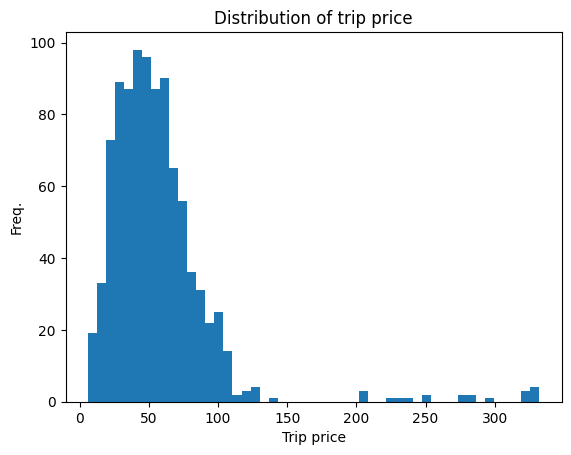

In [125]:
plt.hist(df["Trip_Price"], bins=50)
plt.xlabel("Trip price")
plt.ylabel("Freq.")
plt.title("Distribution of trip price")


# Time_of_Day
- kanske ändra till strings
- 50 nulls


In [105]:
df["Time_of_Day"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Time_of_Day
Non-Null Count  Dtype 
--------------  ----- 
950 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [106]:
df["Time_of_Day"].isna().sum()
df["Time_of_Day"].sort_values().unique()

array(['Afternoon', 'Evening', 'Morning', 'Night', nan], dtype=object)

# Day_of_Week
- kanske ändra till strings
- 50 nulls

In [107]:
df["Day_of_Week"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Day_of_Week
Non-Null Count  Dtype 
--------------  ----- 
950 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [108]:
df["Day_of_Week"].unique()
df["Day_of_Week"].isna().sum()

np.int64(50)

# Passenger_Count
- 50 nulls
- allt annat ser bra ut, inget orimligt

In [109]:
df["Passenger_Count"].describe()

count    950.000000
mean       2.476842
std        1.102249
min        1.000000
25%        1.250000
50%        2.000000
75%        3.000000
max        4.000000
Name: Passenger_Count, dtype: float64

In [110]:
df["Passenger_Count"].info()
df["Passenger_Count"].sort_values().unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Passenger_Count
Non-Null Count  Dtype  
--------------  -----  
950 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


array([ 1.,  2.,  3.,  4., nan])

In [111]:
df["Passenger_Count"].isna().sum()

np.int64(50)

# Traffic_Conditions
- 50 nulls

In [112]:
df["Traffic_Conditions"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Traffic_Conditions
Non-Null Count  Dtype 
--------------  ----- 
950 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [113]:
df["Traffic_Conditions"].isna().sum()
df["Traffic_Conditions"].unique()


array(['Low', 'High', 'Medium', nan], dtype=object)

# Trip_Distance_km
- 50 nulls
- inga orimliga värden. det är höger snedfördelat, vilket är rimligt. det är vanligare med korta resor än långa

In [114]:
df["Trip_Distance_km"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Trip_Distance_km
Non-Null Count  Dtype  
--------------  -----  
950 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [115]:
df["Trip_Distance_km"].describe()

count    950.000000
mean      27.070547
std       19.905300
min        1.230000
25%       12.632500
50%       25.830000
75%       38.405000
max      146.067047
Name: Trip_Distance_km, dtype: float64

In [116]:
df["Trip_Distance_km"].sort_values().unique()

array([  1.23      ,   1.25      ,   1.27      ,   1.34      ,
         1.45      ,   1.53      ,   1.54      ,   1.56      ,
         1.64      ,   1.71      ,   1.76      ,   1.81      ,
         1.89      ,   1.9       ,   1.97      ,   1.98      ,
         2.1       ,   2.14      ,   2.19      ,   2.24      ,
         2.25      ,   2.29      ,   2.3       ,   2.33      ,
         2.41      ,   2.49      ,   2.53      ,   2.54      ,
         2.64      ,   2.69      ,   2.76      ,   2.79      ,
         2.8       ,   2.81      ,   2.83      ,   2.93      ,
         3.        ,   3.11      ,   3.22      ,   3.23      ,
         3.25      ,   3.28      ,   3.3       ,   3.52      ,
         3.53      ,   3.54      ,   3.68      ,   3.76      ,
         3.85      ,   4.11      ,   4.19      ,   4.22      ,
         4.26      ,   4.29      ,   4.4       ,   4.46      ,
         4.49      ,   4.57      ,   4.63      ,   4.65      ,
         4.68      ,   4.72      ,   4.77      ,   4.81

Text(0.5, 1.0, 'Distribution of trip distance')

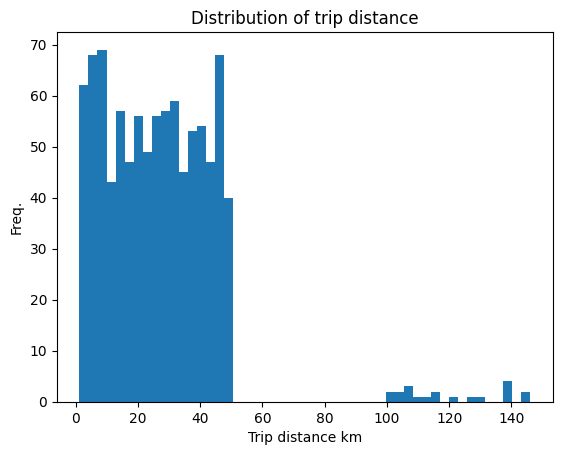

In [126]:
plt.hist(df["Trip_Distance_km"], bins=50)
plt.xlabel("Trip distance km")
plt.ylabel("Freq.")
plt.title("Distribution of trip distance")

# NULLS
- då det är som mest 50 nulls i kolumnerna kommer jag kasta dem, då jag tycker det är för få för att göra något med